In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

In [47]:
mouse_data = os.path.join("data", "mouse_drug_data.csv")
clinical_data = os.path.join("data", "clinicaltrial_data.csv")

mouse_df = pd.read_csv(mouse_data)
clinical_df = pd.read_csv(clinical_data)

merged_df = pd.merge(mouse_df, clinical_df, how="outer", on="Mouse ID")
merged_df

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
...,...,...,...,...,...
1901,j235,Placebo,0,45.000000,0
1902,j235,Placebo,5,46.588820,0
1903,j235,Placebo,10,48.018788,1
1904,j235,Placebo,15,51.161138,1


## Tumor Response to Treatment

In [105]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

tumor_mean = merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumor_mean_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_mean}).reset_index()
tumor_mean_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [106]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_sem = merged_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
tumor_sem_df = pd.DataFrame({"Tumor Volume (mm3)": tumor_sterror}).reset_index()
tumor_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [107]:
# Minor Data Munging to Re-Format the Data Frames

tumor_sem_df2 = tumor_sem_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_sem_df2

tumor_mean_df2 = tumor_mean_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_mean_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


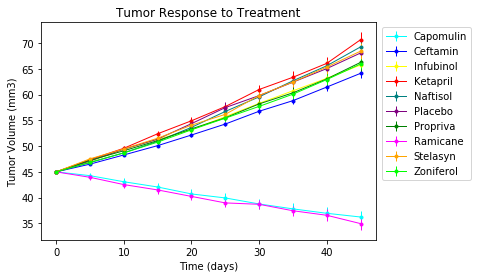

<Figure size 432x288 with 0 Axes>

In [108]:
# Generate the Plot (with Error Bars)

plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Capomulin"], yerr=tumor_sem_df2["Capomulin"], 
             color="cyan", linewidth=1, marker="o", markersize=3, label="Capomulin")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ceftamin"], yerr=tumor_sem_df2["Ceftamin"], 
             color="b", linewidth=1, marker="o", markersize=3, label="Ceftamin")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Infubinol"], yerr=tumor_sem_df2["Infubinol"], 
             color="yellow", linewidth=1, marker="o", markersize=3, label="Infubinol")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ketapril"], yerr=tumor_sem_df2["Ketapril"], 
             color="r", linewidth=1, marker="o", markersize=3, label="Ketapril")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Naftisol"], yerr=tumor_sem_df2["Naftisol"], 
             color="teal", linewidth=1, marker="o", markersize=3, label="Naftisol")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Placebo"], yerr=tumor_sem_df2["Placebo"], 
             color="purple", linewidth=1, marker="o", markersize=3, label="Placebo")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Propriva"], yerr=tumor_sem_df2["Propriva"], 
             color="g", linewidth=1, marker="o", markersize=3, label="Propriva")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Ramicane"], yerr=tumor_sem_df2["Ramicane"], 
             color="magenta", linewidth=1, marker="o", markersize=3, label="Ramicane")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Stelasyn"], yerr=tumor_sem_df2["Stelasyn"], 
             color="orange", linewidth=1, marker="o", markersize=3, label="Stelasyn")
plt.errorbar(tumor_mean_df2.index, tumor_mean_df2["Zoniferol"], yerr=tumor_sem_df2["Zoniferol"], 
             color="lime", linewidth=1, marker="o", markersize=3, label="Zoniferol")

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.show()
plt.savefig("Tumor_Response.png")

## Metastatic Response to Treatment

In [111]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame

met_mean = merged_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
met_mean_df = pd.DataFrame({"Metastatic Sites": met_mean}).reset_index()

met_mean_df2 = met_mean_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
met_mean_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [114]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame

met_sem = merged_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
met_sem_df = pd.DataFrame({"Metastatic Sites": met_sem}).reset_index()

met_sem_df2 = met_sem_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
met_sem_df2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


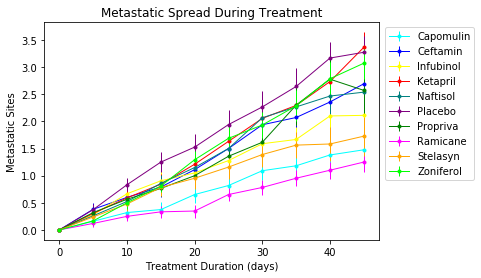

<Figure size 432x288 with 0 Axes>

In [118]:
# Generate the Plot (with Error Bars)

plt.errorbar(met_mean_df2.index, met_mean_df2["Capomulin"], yerr=met_sem_df2["Capomulin"], 
             color="cyan", linewidth=1, marker="o", markersize=3, label="Capomulin")
plt.errorbar(met_mean_df2.index, met_mean_df2["Ceftamin"], yerr=met_sem_df2["Ceftamin"], 
             color="b", linewidth=1, marker="o", markersize=3, label="Ceftamin")
plt.errorbar(met_mean_df2.index, met_mean_df2["Infubinol"], yerr=met_sem_df2["Infubinol"], 
             color="yellow", linewidth=1, marker="o", markersize=3, label="Infubinol")
plt.errorbar(met_mean_df2.index, met_mean_df2["Ketapril"], yerr=met_sem_df2["Ketapril"], 
             color="r", linewidth=1, marker="o", markersize=3, label="Ketapril")
plt.errorbar(met_mean_df2.index, met_mean_df2["Naftisol"], yerr=met_sem_df2["Naftisol"], 
             color="teal", linewidth=1, marker="o", markersize=3, label="Naftisol")
plt.errorbar(met_mean_df2.index, met_mean_df2["Placebo"], yerr=met_sem_df2["Placebo"], 
             color="purple", linewidth=1, marker="o", markersize=3, label="Placebo")
plt.errorbar(met_mean_df2.index, met_mean_df2["Propriva"], yerr=met_sem_df2["Propriva"], 
             color="g", linewidth=1, marker="o", markersize=3, label="Propriva")
plt.errorbar(met_mean_df2.index, met_mean_df2["Ramicane"], yerr=met_sem_df2["Ramicane"], 
             color="magenta", linewidth=1, marker="o", markersize=3, label="Ramicane")
plt.errorbar(met_mean_df2.index, met_mean_df2["Stelasyn"], yerr=met_sem_df2["Stelasyn"], 
             color="orange", linewidth=1, marker="o", markersize=3, label="Stelasyn")
plt.errorbar(met_mean_df2.index, met_mean_df2["Zoniferol"], yerr=met_sem_df2["Zoniferol"], 
             color="lime", linewidth=1, marker="o", markersize=3, label="Zoniferol")

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))
plt.show()
plt.savefig("Metastatic_Spread.png")

In [ ]:
# DATA MUNGING OPTION 

drug_table = pd.pivot_table(merged_df, 
                            values=["Tumor Volume (mm3)"], 
                            index=["Timepoint"], 
                            columns=["Drug"], 
                            aggfunc="mean")
drug_table